In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 한글 폰트 오류 해결
from matplotlib import font_manager, rc 
font_path = "C:\\Users\\이혜림\\Desktop\\Bita5/malgun.ttf" #폰트 파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font",family=font_name)

In [3]:
home = pd.read_csv("./지역별주민+관광지 구분(home).csv")
out = pd.read_csv("./지역별주민+관광지 구분(out).csv")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


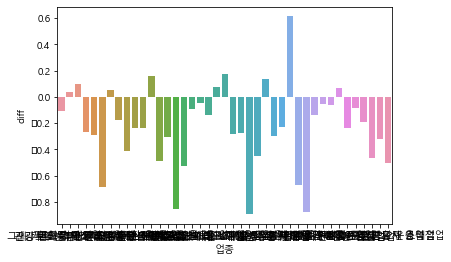

In [15]:
# home
before = home.loc[((home["month"]==2)&(home["year"]==2019)) | ((home["month"]==3)&(home["year"]==2019))|((home["month"]==4)&(home["year"]==2019)),:]
after = home.loc[((home["month"]==2)&(home["year"]==2020)) | ((home["month"]==3)&(home["year"]==2020))|((home["month"]==4)&(home["year"]==2020)),:]

# 업종별로 데이터를 나눈 후 사용 금액 합산
before_amt = before.groupby(["STD_CLSS_NM"])["AMT"].sum()
after_amt = after.groupby(["STD_CLSS_NM"])["AMT"].sum()

# 각 데이터를 하나의 데이터 프레임으로 합침
before_after_amt = pd.DataFrame(before_amt).merge(pd.DataFrame(after_amt), on=before_amt.index)
before_after_amt.columns = ["업종","before_amt", "after_amt"]

# 증감율 칼럼 추가
before_after_amt["diff"]=(before_after_amt["after_amt"]-before_after_amt["before_amt"])/before_after_amt["before_amt"]
sns.barplot(x="업종", y="diff", data=before_after_amt)


In [16]:
before_after_amt.sort_values(by="diff")

,업종,before_amt,after_amt,diff
23,여행사업,8396510491,900171829,-0.892792
30,정기 항공 운송업,46162081000,5693957071,-0.876653
14,면세점,17675797732,2644003834,-0.850417
5,그외 기타 스포츠시설 운영업,627540110,198343940,-0.683934
29,전시 및 행사 대행업,9608623294,3160934305,-0.671032
15,버스 운송업,7282096366,3467264654,-0.523864
40,휴양콘도 운영업,2801724782,1399983280,-0.500314
12,내항 여객 운송업,1120276955,569347200,-0.491780
38,호텔업,28906445481,15515865688,-0.463239
24,욕탕업,41128218685,22729110338,-0.447360


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


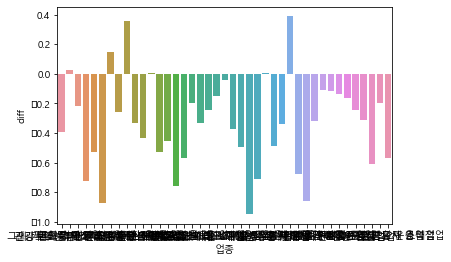

In [17]:
before = out.loc[((out["month"]==2)&(out["year"]==2019)) | ((out["month"]==3)&(out["year"]==2019))|((out["month"]==4)&(out["year"]==2019)),:]
after = out.loc[((out["month"]==2)&(out["year"]==2020)) | ((out["month"]==3)&(out["year"]==2020))|((out["month"]==4)&(out["year"]==2020)),:]

# 업종별로 데이터를 나눈 후 사용 금액 합산
before_amt = before.groupby(["STD_CLSS_NM"])["AMT"].sum()
after_amt = after.groupby(["STD_CLSS_NM"])["AMT"].sum()

# 각 데이터를 하나의 데이터 프레임으로 합침
out_before_after_amt = pd.DataFrame(before_amt).merge(pd.DataFrame(after_amt), on=before_amt.index)
out_before_after_amt.columns = ["업종","before_amt", "after_amt"]

# 증감율 칼럼 추가
out_before_after_amt["diff"]=(out_before_after_amt["after_amt"]-out_before_after_amt["before_amt"])/out_before_after_amt["before_amt"]
sns.barplot(x="업종", y="diff", data=out_before_after_amt)


In [18]:
out_before_after_amt.sort_values(by="diff")

,업종,before_amt,after_amt,diff
23,여행사업,15984766874,829646809,-0.948098
5,그외 기타 스포츠시설 운영업,12369300,1564650,-0.873505
30,정기 항공 운송업,84800650403,11640452415,-0.862732
14,면세점,71170849921,17176180906,-0.758663
3,관광 민예품 및 선물용품 소매업,1305823729,360188770,-0.724167
24,욕탕업,2511412333,727868445,-0.710176
29,전시 및 행사 대행업,8968021319,2868642379,-0.680125
38,호텔업,14245359382,5573518426,-0.608748
15,버스 운송업,41151876700,17647652150,-0.571158
40,휴양콘도 운영업,9535646080,4124834868,-0.567430


In [33]:
# 두 개 합치기
diff = before_after_amt.merge(out_before_after_amt, on=["업종"])[["업종","diff_x","diff_y"]]
diff.columns = ["STD_CLSS_NM","diff_home","diff_out"]

In [34]:
diff

,STD_CLSS_NM,diff_home,diff_out
0,건강보조식품 소매업,-0.106782,-0.393612
1,골프장 운영업,0.034461,0.022604
2,과실 및 채소 소매업,0.100852,-0.219717
3,관광 민예품 및 선물용품 소매업,-0.267715,-0.724167
4,그외 기타 분류안된 오락관련 서비스업,-0.286684,-0.528081
5,그외 기타 스포츠시설 운영업,-0.683934,-0.873505
6,그외 기타 종합 소매업,0.051095,0.147123
7,기타 대형 종합 소매업,-0.177600,-0.256316
8,기타 수상오락 서비스업,-0.409164,0.354592
9,기타 외국식 음식점업,-0.238770,-0.334526


In [43]:
home_merge = home.merge(diff, on=["STD_CLSS_NM"]).drop(["Unnamed: 0","diff_out"], axis=1)
home_merge.to_csv("./지역별주민+관광지 구분(home).csv", index=False)

In [44]:
out_merge = out.merge(diff, on=["STD_CLSS_NM"]).drop(["Unnamed: 0","diff_home"], axis=1)
out_merge.to_csv("./지역별주민+관광지 구분(out).csv", index=False)

In [45]:
home = pd.read_csv("./지역별주민+관광지 구분(home).csv")
out = pd.read_csv("./지역별주민+관광지 구분(out).csv")

In [46]:
home

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,year,FLC,month,AMT,out_home,diff_home
0,강원,건강보조식품 소매업,강원,1020s,2019,family,2,216200,1,-0.106782
1,강원,건강보조식품 소매업,강원,1020s,2019,family,3,88500,1,-0.106782
2,강원,건강보조식품 소매업,강원,1020s,2019,family,4,250000,1,-0.106782
3,강원,건강보조식품 소매업,강원,1020s,2019,family,5,449000,1,-0.106782
4,강원,건강보조식품 소매업,강원,1020s,2019,family,6,270000,1,-0.106782
...,...,...,...,...,...,...,...,...,...,...
34838,제주,정기 항공 운송업,제주,3060s,2020,family,4,47349500,1,-0.876653
34839,제주,정기 항공 운송업,제주,3060s,2020,single,1,1096027,1,-0.876653
34840,제주,정기 항공 운송업,제주,3060s,2020,single,2,380700,1,-0.876653
34841,제주,정기 항공 운송업,제주,3060s,2020,single,3,123200,1,-0.876653


In [49]:
merge_data = pd.concat([home,out], axis=0)
merge_data.to_csv("./merge_data.csv", index=False)

In [50]:
merge_data

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,year,FLC,month,AMT,out_home,diff_home,diff_out
0,강원,건강보조식품 소매업,강원,1020s,2019,family,2,216200,1,-0.106782,NaN
1,강원,건강보조식품 소매업,강원,1020s,2019,family,3,88500,1,-0.106782,NaN
2,강원,건강보조식품 소매업,강원,1020s,2019,family,4,250000,1,-0.106782,NaN
3,강원,건강보조식품 소매업,강원,1020s,2019,family,5,449000,1,-0.106782,NaN
4,강원,건강보조식품 소매업,강원,1020s,2019,family,6,270000,1,-0.106782,NaN
...,...,...,...,...,...,...,...,...,...,...,...
230587,충남,정기 항공 운송업,제주,3060s,2019,family,6,2172000,0,NaN,-0.862732
230588,충남,정기 항공 운송업,제주,3060s,2019,family,7,707000,0,NaN,-0.862732
230589,충남,정기 항공 운송업,제주,3060s,2019,family,8,1481500,0,NaN,-0.862732
230590,충남,정기 항공 운송업,제주,3060s,2019,family,9,169000,0,NaN,-0.862732
